<a href="https://colab.research.google.com/github/Zaanol/exploratory-analysis-leopards/blob/master/Leopards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Variáveis escolhidas para análise:
Quantitativa: Dias de isolamento, pois esta poderia influenciar o cortisol pois períodos prolongados de isolamento podem aumentar o estresse em animais.
Qualitativa: Enriquecimento ambiental, pois esta poderia influenciar o cortisol já que ambientes enriquecidos tendem a reduzir o estresse em animais cativos.

Teste de Shapiro-Wilk para normalidade
Cortisol: Estatística = 0.98733, p-value = 0.00985
Os dados de cortisol não seguem uma distribuição normal.

Dias de Isolamento: Estatística = 0.98854, p-value = 0.01812
Os dados de dias de isolamento não seguem uma distribuição normal.

Média de cortisol: 445.801
Mediana de cortisol: 441.71000000000004
Moda de cortisol: 144.65

Média de dias de isolamento: 16.80666666666667
Mediana de dias de isolamento: 16.0
Moda de dias de isolamento: 10


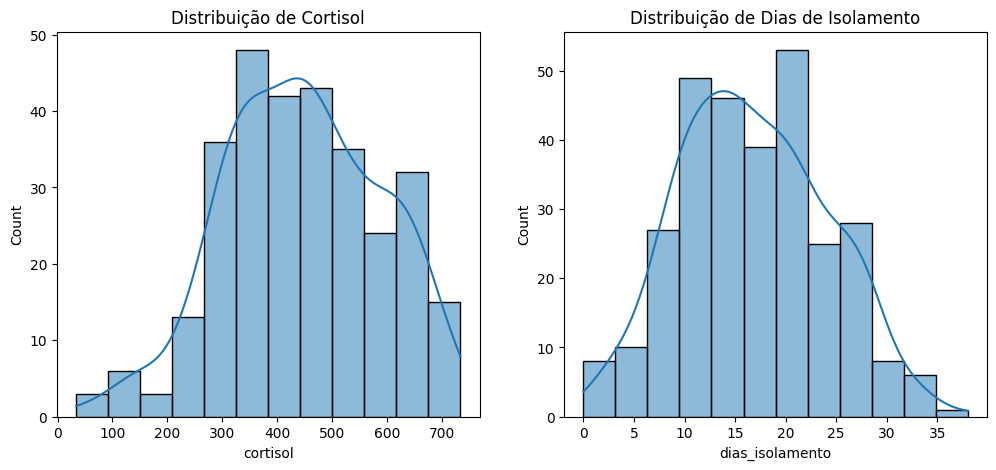

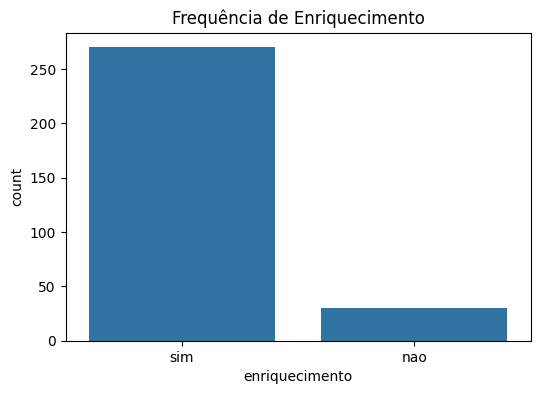

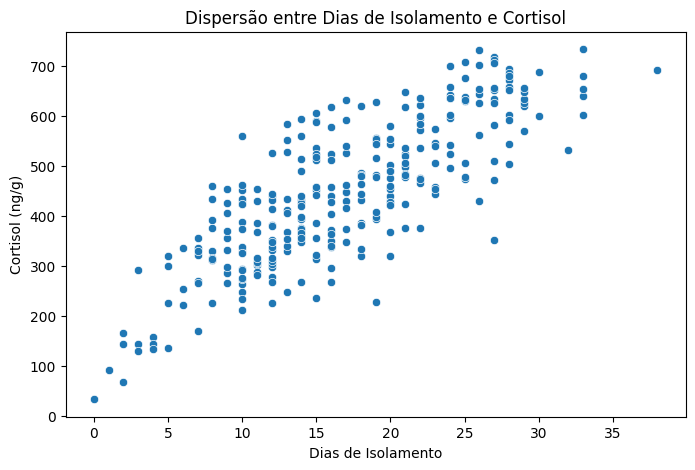

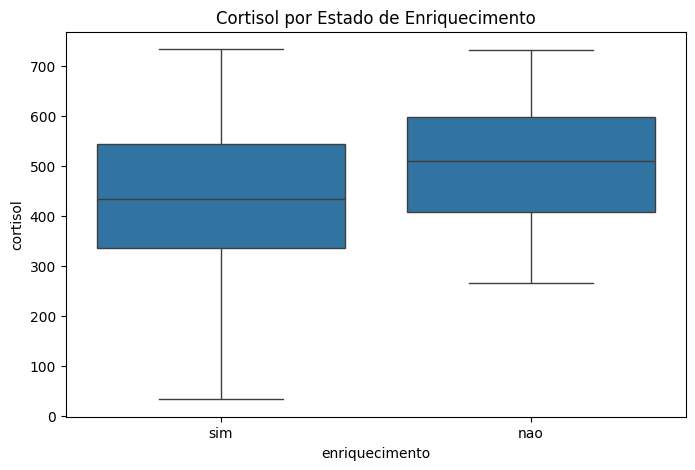


Correlação de Spearman entre Dias de Isolamento e Cortisol
Correlação: 0.789, p-value: 0.000
Há uma correlação estatisticamente significativa entre dias de isolamento e níveis de cortisol.

Teste de Mann-Whitney U: U = 3023.000, p-value = 0.023
Há uma diferença estatisticamente significativa nos níveis de cortisol entre grupos com e sem enriquecimento (Mann-Whitney U).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu

drive.mount('/content/drive')

# Carregar os dados
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/leopardos.xlsx')

print("\nVariáveis escolhidas para análise:")
print("Quantitativa: Dias de isolamento, pois esta poderia influenciar o cortisol pois períodos prolongados de isolamento podem aumentar o estresse em animais.")
print("Qualitativa: Enriquecimento ambiental, pois esta poderia influenciar o cortisol já que ambientes enriquecidos tendem a reduzir o estresse em animais cativos.")

# Verificando a distribuição do cortisol e dias de isolamento usando Shapiro-Wilk para normalidade
shapiro_cortisol = stats.shapiro(df['cortisol'])
shapiro_isolamento = stats.shapiro(df['dias_isolamento'])
print("\nTeste de Shapiro-Wilk para normalidade")
print(f"Cortisol: Estatística = {shapiro_cortisol.statistic:.5f}, p-value = {shapiro_cortisol.pvalue:.5f}")
if shapiro_cortisol.pvalue < 0.05:
    print("Os dados de cortisol não seguem uma distribuição normal.")
else:
    print("Os dados de cortisol seguem uma distribuição normal.")

print(f"\nDias de Isolamento: Estatística = {shapiro_isolamento.statistic:.5f}, p-value = {shapiro_isolamento.pvalue:.5f}")
if shapiro_isolamento.pvalue < 0.05:
    print("Os dados de dias de isolamento não seguem uma distribuição normal.")
else:
    print("Os dados de dias de isolamento seguem uma distribuição normal.")

# Medidas de posição para cortisol e dias de isolamento
print("\nMédia de cortisol:", df['cortisol'].mean())
print("Mediana de cortisol:", df['cortisol'].median())
print("Moda de cortisol:", df['cortisol'].mode()[0])

print("\nMédia de dias de isolamento:", df['dias_isolamento'].mean())
print("Mediana de dias de isolamento:", df['dias_isolamento'].median())
print("Moda de dias de isolamento:", df['dias_isolamento'].mode()[0])

# Histogramas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cortisol'], kde=True)
plt.title('Distribuição de Cortisol')

plt.subplot(1, 2, 2)
sns.histplot(df['dias_isolamento'], kde=True)
plt.title('Distribuição de Dias de Isolamento')
plt.show()

# Gráfico de barras para enriquecimento
plt.figure(figsize=(6, 4))
sns.countplot(x='enriquecimento', data=df)
plt.title('Frequência de Enriquecimento')
plt.show()

# Diagrama de dispersão entre dias de isolamento e cortisol
plt.figure(figsize=(8, 5))
sns.scatterplot(x='dias_isolamento', y='cortisol', data=df)
plt.title('Dispersão entre Dias de Isolamento e Cortisol')
plt.xlabel('Dias de Isolamento')
plt.ylabel('Cortisol (ng/g)')
plt.show()

# Boxplot para comparar cortisol em diferentes estados de enriquecimento
plt.figure(figsize=(8, 5))
sns.boxplot(x='enriquecimento', y='cortisol', data=df)
plt.title('Cortisol por Estado de Enriquecimento')
plt.show()

# Correlação entre Dias de Isolamento e Cortisol (usando Spearman)
correlation, p_value = spearmanr(df['dias_isolamento'], df['cortisol'])
print(f"\nCorrelação de Spearman entre Dias de Isolamento e Cortisol")
print(f"Correlação: {correlation:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Há uma correlação estatisticamente significativa entre dias de isolamento e níveis de cortisol.")
else:
    print("Não há uma correlação estatisticamente significativa entre dias de isolamento e níveis de cortisol.")

# Comparar os níveis de cortisol baseados no enriquecimento
# Separar os grupos
group_enrich = df[df['enriquecimento'] == 'sim']['cortisol']
group_no_enrich = df[df['enriquecimento'] == 'nao']['cortisol']

# Teste de Mann-Whitney U (não assume distribuições normais)
u_stat, p_mannwhitney = mannwhitneyu(group_enrich, group_no_enrich)
print(f"\nTeste de Mann-Whitney U: U = {u_stat:.3f}, p-value = {p_mannwhitney:.3f}")

# Resultado mann-whitney
if p_mannwhitney < 0.05:
    print("Há uma diferença estatisticamente significativa nos níveis de cortisol entre grupos com e sem enriquecimento (Mann-Whitney U).")
else:
    print("Não há diferença estatisticamente significativa nos níveis de cortisol entre grupos com e sem enriquecimento (Mann-Whitney U).")